# DarshanUtils for Python

This notebook gives an overwiew of features provided by the Python bindings for DarshanUtils.

By default all records, metadata, available modules and the name records are loaded when opening a Darshan log:

In [122]:
import darshan

report = darshan.DarshanReport("example-logs/example.darshan", read_all=True, dtype='numpy')  # Default behavior
report.info()

Filename:       example-logs/example.darshan
Times:          2017-03-20 09:07:47 to 2017-03-20 09:09:43 (Duration 0:01:56)
Executeable:    /global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32
Processes:      2048
JobID:          4478544
UID:            69615
Modules in Log: ['POSIX', 'MPI-IO', 'LUSTRE', 'STDIO']
Loaded Records: {'POSIX': 1, 'MPI-IO': 1, 'STDIO': 129, 'LUSTRE': 1}
Name Records:   4
Darshan/Hints:  {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(139730696811568) (tmp)


In [123]:
report.modules

{'POSIX': {'len': 186, 'ver': 3, 'idx': 1, 'num_records': 1},
 'MPI-IO': {'len': 154, 'ver': 2, 'idx': 2, 'num_records': 1},
 'LUSTRE': {'len': 87, 'ver': 1, 'idx': 7, 'num_records': 1},
 'STDIO': {'len': 3234, 'ver': 1, 'idx': 8, 'num_records': 129}}

A few of the internal data structures explained:

In [124]:
# report.metadata         # dictionary with raw metadata from darshan log
# report.modules          # dictionary with raw module info from darshan log (need: technical, module idx)
# report.name_records     # dictionary for resovling name records: id -> path/name
# report.records          # per module "dataframes"/dictionaries holding loaded records

The darshan report holds a variety of namespaces for report related data. All of them are also referenced in `report.data` at the moment, but reliance on this internal organization of the report object is discouraged once the API stabilized. Currently, `report.data` references the following information:

In [125]:
report.data.keys()

dict_keys(['version', 'metadata', 'records', 'summary', 'modules', 'counters', 'name_records', 'mounts'])

In [126]:
report.mod_read_all_records('POSIX')

In [127]:
report.mod_read_all_records('STDIO')

In [128]:
report.update_name_records()
report.info()

Filename:       example-logs/example.darshan
Times:          2017-03-20 09:07:47 to 2017-03-20 09:09:43 (Duration 0:01:56)
Executeable:    /global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32
Processes:      2048
JobID:          4478544
UID:            69615
Modules in Log: ['POSIX', 'MPI-IO', 'LUSTRE', 'STDIO']
Loaded Records: {'POSIX': 1, 'MPI-IO': 1, 'STDIO': 129, 'LUSTRE': 1}
Name Records:   4
Darshan/Hints:  {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(139730696811568) (tmp)


In [129]:
# visualization helper used by different examples in the remainder of this notebook
from IPython.display import display, HTML
# usage: display(obj)

### Record Formats and Selectively Loading Records

For memory efficiant analysis, it is possible to supress records from being loaded automatically. This is useful, for example, when analysis considers only records of a particular layer/module.

In [130]:
import darshan
report = darshan.DarshanReport("example-logs/example.darshan", read_all=False, lookup_name_records=True) # Loads no records!

In [131]:
# expected to fail, as no records were loaded
try:
    print(len(report.records['STDIO']), "records loaded for STDIO.")
except:
    print("No STDIO records loaded for this report yet.")

No STDIO records loaded for this report yet.


Additional records then can be loaded selectively, for example, on a per module basis:

#### dtype: pandas

In [132]:
report.mod_read_all_records("STDIO", dtype="pandas")

In [133]:
print('id', report.records['STDIO'][0]['id'])
print('rank', report.records['STDIO'][0]['rank'])
display(report.records['STDIO'][0]['counters'])
display(report.records['STDIO'][0]['fcounters'])

id -1
rank -1


,rank,id,STDIO_OPENS,STDIO_FDOPENS,STDIO_READS,STDIO_WRITES,STDIO_SEEKS,STDIO_FLUSHES,STDIO_BYTES_WRITTEN,STDIO_BYTES_READ,STDIO_MAX_BYTE_READ,STDIO_MAX_BYTE_WRITTEN,STDIO_FASTEST_RANK,STDIO_FASTEST_RANK_BYTES,STDIO_SLOWEST_RANK,STDIO_SLOWEST_RANK_BYTES
0,0,1.592018e+19,1,-1,0,6,0,0,280,0,0,279,0,0,0,0
0,0,1.592018e+19,1,-1,0,6,0,0,280,0,0,279,0,0,0,0
0,0,7.238257e+18,1,-1,0,68,0,0,3029,0,0,3028,0,0,0,0
0,0,7.238257e+18,1,-1,0,68,0,0,3029,0,0,3028,0,0,0,0
0,16,7.238257e+18,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2000,7.238257e+18,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
0,2016,7.238257e+18,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
0,2016,7.238257e+18,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
0,2032,7.238257e+18,1,-1,0,0,0,0,0,0,0,0,0,0,0,0


,rank,id,STDIO_F_META_TIME,STDIO_F_WRITE_TIME,STDIO_F_READ_TIME,STDIO_F_OPEN_START_TIMESTAMP,STDIO_F_CLOSE_START_TIMESTAMP,STDIO_F_WRITE_START_TIMESTAMP,STDIO_F_READ_START_TIMESTAMP,STDIO_F_OPEN_END_TIMESTAMP,STDIO_F_CLOSE_END_TIMESTAMP,STDIO_F_WRITE_END_TIMESTAMP,STDIO_F_READ_END_TIMESTAMP,STDIO_F_FASTEST_RANK_TIME,STDIO_F_SLOWEST_RANK_TIME,STDIO_F_VARIANCE_RANK_TIME,STDIO_F_VARIANCE_RANK_BYTES
0,0,1.592018e+19,0.0,0.000068,0.0,0.0,0.0,0.077528,0.0,0.0,0.0,116.283583,0.0,0.0,0.0,0.0,0.0
0,0,1.592018e+19,0.0,0.000068,0.0,0.0,0.0,0.077528,0.0,0.0,0.0,116.283583,0.0,0.0,0.0,0.0,0.0
0,0,7.238257e+18,0.0,-2662.746634,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,0,7.238257e+18,0.0,-2662.746634,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,16,7.238257e+18,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2000,7.238257e+18,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,2016,7.238257e+18,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,2016,7.238257e+18,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,2032,7.238257e+18,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


#### dtype: dict

In [134]:
report.mod_read_all_records("STDIO", dtype='dict')
report.records['STDIO'][0]

{'id': 15920181672442173319,
 'rank': 0,
 'counters': {'STDIO_OPENS': 1,
  'STDIO_FDOPENS': -1,
  'STDIO_READS': 0,
  'STDIO_WRITES': 6,
  'STDIO_SEEKS': 0,
  'STDIO_FLUSHES': 0,
  'STDIO_BYTES_WRITTEN': 280,
  'STDIO_BYTES_READ': 0,
  'STDIO_MAX_BYTE_READ': 0,
  'STDIO_MAX_BYTE_WRITTEN': 279,
  'STDIO_FASTEST_RANK': 0,
  'STDIO_FASTEST_RANK_BYTES': 0,
  'STDIO_SLOWEST_RANK': 0,
  'STDIO_SLOWEST_RANK_BYTES': 0},
 'fcounters': {'STDIO_F_META_TIME': 0.0,
  'STDIO_F_WRITE_TIME': 6.794929504394531e-05,
  'STDIO_F_READ_TIME': 0.0,
  'STDIO_F_OPEN_START_TIMESTAMP': 0.0,
  'STDIO_F_CLOSE_START_TIMESTAMP': 0.0,
  'STDIO_F_WRITE_START_TIMESTAMP': 0.07752799987792969,
  'STDIO_F_READ_START_TIMESTAMP': 0.0,
  'STDIO_F_OPEN_END_TIMESTAMP': 0.0,
  'STDIO_F_CLOSE_END_TIMESTAMP': 0.0,
  'STDIO_F_WRITE_END_TIMESTAMP': 116.28358292579651,
  'STDIO_F_READ_END_TIMESTAMP': 0.0,
  'STDIO_F_FASTEST_RANK_TIME': 0.0,
  'STDIO_F_SLOWEST_RANK_TIME': 0.0,
  'STDIO_F_VARIANCE_RANK_TIME': 0.0,
  'STDIO_F_VARIANCE_

#### dtype: numpy

In [135]:
report.mod_read_all_records("STDIO", dtype='numpy')
report.records['STDIO'][0]

{'id': 15920181672442173319,
 'rank': 0,
 'counters': array([  1,  -1,   0,   6,   0,   0, 280,   0,   0, 279,   0,   0,   0,
          0]),
 'fcounters': array([0.00000000e+00, 6.79492950e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.75279999e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.16283583e+02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00])}

#### The Log in Memory

Let's have a look at how calling `report.mod_read_all_records("STDIO")` changed the state of the log in memory.

In [136]:
# Compare to info line: "Loaded Records: {...}"
report.info()

Filename:       example-logs/example.darshan
Times:          2017-03-20 09:07:47 to 2017-03-20 09:09:43 (Duration 0:01:56)
Executeable:    /global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32
Processes:      2048
JobID:          4478544
UID:            69615
Modules in Log: ['POSIX', 'MPI-IO', 'LUSTRE', 'STDIO']
Loaded Records: {'STDIO': 129}
Name Records:   2
Darshan/Hints:  {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(139730656928192) (tmp)


When interacting on individual log data for example in a for loop you would most likely care about the following instead:

In [137]:
print("Num records:", len(report.records['STDIO']))

# show first 10 records
for rec in report.records['STDIO'][0:10]:
    print(rec)

Num records: 129
{'id': 15920181672442173319, 'rank': 0, 'counters': array([  1,  -1,   0,   6,   0,   0, 280,   0,   0, 279,   0,   0,   0,
         0]), 'fcounters': array([0.00000000e+00, 6.79492950e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.75279999e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.16283583e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])}
{'id': 7238257241479193519, 'rank': 0, 'counters': array([   1,   -1,    0,   68,    0,    0, 3029,    0,    0, 3028,    0,
          0,    0,    0]), 'fcounters': array([    0.        , -2662.74663377,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ])}
{'id': 7238257241479193519, 'rank': 16, 'counters': array([ 1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]), 'fcounters'

### Aggregation and Filtering (Experimental)

Darshan log data is routinely aggregated for quick overview. The report object offers a few methods to perform common aggregations:

Report aggregations and summarization remains**experimental** for now, mostly to allow interfaces to stabilize. But experimental features can be switched on easily by invoking `darshan.enable_experimental()`:

In [138]:
import darshan
darshan.enable_experimental(verbose=True) # Enable verbosity, listing new functionality

Added method mod_agg_iohist to DarshanReport.
Added method print_module_records to DarshanReport.
Added method summarize to DarshanReport.
Added method merge to DarshanReport.
Added method filter to DarshanReport.
Added method create_timeline to DarshanReport.
Added method name_records_summary to DarshanReport.
Added method create_time_summary to DarshanReport.
Added method reduce to DarshanReport.
Added method create_sankey to DarshanReport.
Added method records_as_dict to DarshanReport.
Added method agg_ioops to DarshanReport.


In [139]:
# Example report, which counts records in log across modules 
report.name_records_summary()

{15920181672442173319: {'name': '<STDOUT>', 'counts': {'STDIO': 1}},
 7238257241479193519: {'name': '<STDERR>', 'counts': {'STDIO': 128}}}

### Chain operations like filtering and reductions
The filter and reduce operations return DarshanReports themsleves, thus allow to convieniently chain operations.

In [140]:
import pprint

import darshan
darshan.enable_experimental()

report = darshan.DarshanReport("example-logs/example.darshan", read_all=True, dtype='numpy')
report.name_records

{14734109647742566553: '<STDIN>',
 15920181672442173319: '<STDOUT>',
 7238257241479193519: '<STDERR>',
 6301063301082038805: '/scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5'}

In [141]:
report.filter(name_records=[6301063301082038805, 15920181672442173319]).records

{'POSIX': [{'id': 6301063301082038805,
   'rank': -1,
   'counters': array([         2049,            -1,            -1,             0,
                  16402,         16404,             0,             0,
                      0,             0,            -1,            -1,
                      0,             0,             0, 2199023259968,
                      0, 2199023261831,             0,             0,
                      0,         16384,             0,             0,
                      8,         16401,       1048576,             0,
              134217728,             0,             0,             0,
                      0,             0,             0,             0,
                      0,             0,             0,             4,
                     14,             0,             0,             0,
                      0,             0,             0,         16384,
                      0,  274743689216,  274743691264,             0,
                      0,

In [142]:
# reduce all after filtering
report.filter(pattern="*.hdf5").reduce().records

{'POSIX': [{'id': '*',
   'rank': -1,
   'counters': array([         2049,            -1,            -1,             0,
                  16402,         16404,             0,             0,
                      0,             0,            -1,            -1,
                      0,             0,             0, 2199023259968,
                      0, 2199023261831,             0,             0,
                      0,         16384,             0,             0,
                      8,         16401,       1048576,             0,
              134217728,             0,             0,             0,
                      0,             0,             0,             0,
                      0,             0,             0,             4,
                     14,             0,             0,             0,
                      0,             0,             0,         16384,
                      0,  274743689216,  274743691264,             0,
                      0,         10240, 

In [143]:
# only preserve some
report.filter(name_records=[6301063301082038805]).reduce(mods=['POSIX', 'STDIO']).records

{'POSIX': [{'id': '*',
   'rank': -1,
   'counters': array([         2049,            -1,            -1,             0,
                  16402,         16404,             0,             0,
                      0,             0,            -1,            -1,
                      0,             0,             0, 2199023259968,
                      0, 2199023261831,             0,             0,
                      0,         16384,             0,             0,
                      8,         16401,       1048576,             0,
              134217728,             0,             0,             0,
                      0,             0,             0,             0,
                      0,             0,             0,             4,
                     14,             0,             0,             0,
                      0,             0,             0,         16384,
                      0,  274743689216,  274743691264,             0,
                      0,         10240, 

In [144]:
# expected to fail
try:
    pprint.pprint(report.summary['agg_ioops'])
except:
    print("IOOPS have not been aggregated for this report.")

IOOPS have not been aggregated for this report.


In [145]:
report.read_all() 
report.summarize()

In [146]:
report.summary['agg_ioops']

{'MPI-IO': {'MPIIO_INDEP_OPENS': 0,
  'MPIIO_COLL_OPENS': 2048,
  'MPIIO_INDEP_READS': 0,
  'MPIIO_INDEP_WRITES': 18,
  'MPIIO_COLL_READS': 0,
  'MPIIO_COLL_WRITES': 16384,
  'MPIIO_SPLIT_READS': 0,
  'MPIIO_SPLIT_WRITES': 0,
  'MPIIO_NB_READS': 0,
  'MPIIO_NB_WRITES': 0,
  'MPIIO_SYNCS': 0,
  'MPIIO_HINTS': 0,
  'MPIIO_VIEWS': 32768,
  'MPIIO_MODE': 9,
  'MPIIO_BYTES_READ': 0,
  'MPIIO_BYTES_WRITTEN': 2199023259968,
  'MPIIO_RW_SWITCHES': 0,
  'MPIIO_MAX_READ_TIME_SIZE': 0,
  'MPIIO_MAX_WRITE_TIME_SIZE': 134217728,
  'MPIIO_SIZE_READ_AGG_0_100': 0,
  'MPIIO_SIZE_READ_AGG_100_1K': 0,
  'MPIIO_SIZE_READ_AGG_1K_10K': 0,
  'MPIIO_SIZE_READ_AGG_10K_100K': 0,
  'MPIIO_SIZE_READ_AGG_100K_1M': 0,
  'MPIIO_SIZE_READ_AGG_1M_4M': 0,
  'MPIIO_SIZE_READ_AGG_4M_10M': 0,
  'MPIIO_SIZE_READ_AGG_10M_100M': 0,
  'MPIIO_SIZE_READ_AGG_100M_1G': 0,
  'MPIIO_SIZE_READ_AGG_1G_PLUS': 0,
  'MPIIO_SIZE_WRITE_AGG_0_100': 4,
  'MPIIO_SIZE_WRITE_AGG_100_1K': 14,
  'MPIIO_SIZE_WRITE_AGG_1K_10K': 0,
  'MPIIO_SIZE_W

Or fine grained:

In [147]:
report.mod_agg_iohist("MPI-IO")  # to create the histograms

{'READ_0_100': 0,
 'READ_100_1K': 0,
 'READ_1K_10K': 0,
 'READ_10K_100K': 0,
 'READ_100K_1M': 0,
 'READ_1M_4M': 0,
 'READ_4M_10M': 0,
 'READ_10M_100M': 0,
 'READ_100M_1G': 0,
 'READ_1G_PLUS': 0,
 'WRITE_0_100': 4,
 'WRITE_100_1K': 14,
 'WRITE_1K_10K': 0,
 'WRITE_10K_100K': 0,
 'WRITE_100K_1M': 0,
 'WRITE_1M_4M': 0,
 'WRITE_4M_10M': 0,
 'WRITE_10M_100M': 0,
 'WRITE_100M_1G': 16384,
 'WRITE_1G_PLUS': 0}

In [148]:
report.agg_ioops()               # to create the combined operation type summary

{'MPI-IO': {'MPIIO_INDEP_OPENS': 0,
  'MPIIO_COLL_OPENS': 2048,
  'MPIIO_INDEP_READS': 0,
  'MPIIO_INDEP_WRITES': 18,
  'MPIIO_COLL_READS': 0,
  'MPIIO_COLL_WRITES': 16384,
  'MPIIO_SPLIT_READS': 0,
  'MPIIO_SPLIT_WRITES': 0,
  'MPIIO_NB_READS': 0,
  'MPIIO_NB_WRITES': 0,
  'MPIIO_SYNCS': 0,
  'MPIIO_HINTS': 0,
  'MPIIO_VIEWS': 32768,
  'MPIIO_MODE': 9,
  'MPIIO_BYTES_READ': 0,
  'MPIIO_BYTES_WRITTEN': 2199023259968,
  'MPIIO_RW_SWITCHES': 0,
  'MPIIO_MAX_READ_TIME_SIZE': 0,
  'MPIIO_MAX_WRITE_TIME_SIZE': 134217728,
  'MPIIO_SIZE_READ_AGG_0_100': 0,
  'MPIIO_SIZE_READ_AGG_100_1K': 0,
  'MPIIO_SIZE_READ_AGG_1K_10K': 0,
  'MPIIO_SIZE_READ_AGG_10K_100K': 0,
  'MPIIO_SIZE_READ_AGG_100K_1M': 0,
  'MPIIO_SIZE_READ_AGG_1M_4M': 0,
  'MPIIO_SIZE_READ_AGG_4M_10M': 0,
  'MPIIO_SIZE_READ_AGG_10M_100M': 0,
  'MPIIO_SIZE_READ_AGG_100M_1G': 0,
  'MPIIO_SIZE_READ_AGG_1G_PLUS': 0,
  'MPIIO_SIZE_WRITE_AGG_0_100': 4,
  'MPIIO_SIZE_WRITE_AGG_100_1K': 14,
  'MPIIO_SIZE_WRITE_AGG_1K_10K': 0,
  'MPIIO_SIZE_W

### Report Algebra (Experimental)

Various operations are implemented to merge, combine and manipulate log records. This is useful for analysis task, but can also be used to construct performance projections or extrapolation.

For convienience, we overload some of the operations provided by Python when they resemble intuitive equivalence to their mathematical counterparts. In particular, we enable the combination of different object types.

In [149]:
import darshan
darshan.enable_experimental()

Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,16402,2049,0,16404,0,0,POSIX
0,18,0,0,0,0,0,MPIIND
0,16384,2048,0,0,0,0,MPICOL
0,74,129,0,0,0,0,STDIO



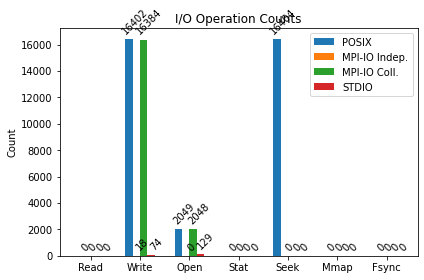

Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,16402,2049,0,16404,0,0,POSIX
0,18,0,0,0,0,0,MPIIND
0,16384,2048,0,0,0,0,MPICOL
0,74,129,0,0,0,0,STDIO



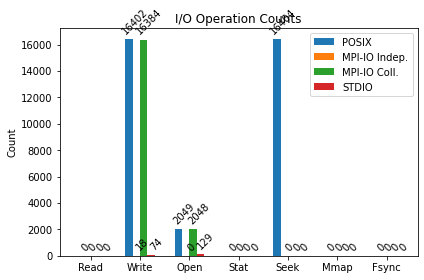

Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,32804,4098,0,32808,0,0,POSIX
0,36,0,0,0,0,0,MPIIND
0,32768,4096,0,0,0,0,MPICOL
0,148,258,0,0,0,0,STDIO



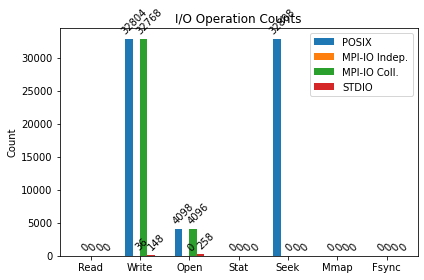

In [150]:
# merging records
from darshan.experimental.plots.matplotlib import plot_access_histogram
from darshan.experimental.plots.matplotlib import plot_opcounts

r1 = darshan.DarshanReport("example-logs/example.darshan", read_all=True, dtype='numpy')
r2 = darshan.DarshanReport("example-logs/example2.darshan", read_all=True, dtype='numpy')
rx = r1 + r2

for r in [r1, r2, rx]:
    plt = plot_opcounts(r)
    plt.show()

In [151]:
# multiply records with a scalar (think, four times the I/O load)
#r1 = darshan.DarshanReport("example.darshan", read_all=True)
#rx = r1 * 4
#plot_opcounts(rx)

In [152]:
# rebase via timedelta
#r1 = darshan.DarshanReport("example.darshan", read_all=True)
#dt = datetime.timedelta()
#rx = r1 + dt

## Plotting

Summarizing... iohist POSIX


<module 'matplotlib.pyplot' from '/home/ubuntu/.local/lib/python3.8/site-packages/matplotlib-3.4.0rc1-py3.8-linux-x86_64.egg/matplotlib/pyplot.py'>

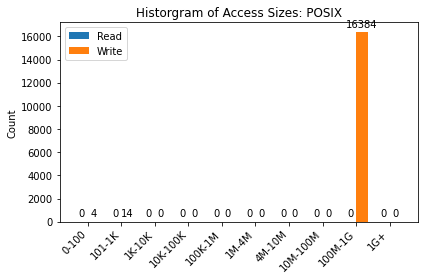

In [153]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example-logs/example.darshan", dtype='numpy')
r3.mod_read_all_records('POSIX')

from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(r3, mod='POSIX')

Summarizing... iohist MPI-IO


<module 'matplotlib.pyplot' from '/home/ubuntu/.local/lib/python3.8/site-packages/matplotlib-3.4.0rc1-py3.8-linux-x86_64.egg/matplotlib/pyplot.py'>

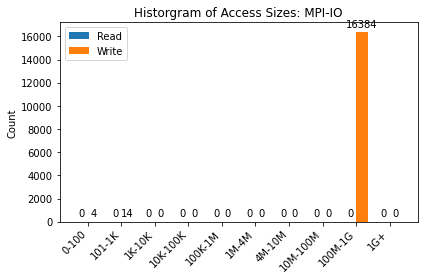

In [154]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example-logs/example.darshan", dtype='numpy')
r3.mod_read_all_records('MPI-IO')

from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(r3, mod='MPI-IO')

Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,16402,2049,0,16404,0,0,POSIX
0,18,0,0,0,0,0,MPIIND
0,16384,2048,0,0,0,0,MPICOL
0,74,129,0,0,0,0,STDIO



<module 'matplotlib.pyplot' from '/home/ubuntu/.local/lib/python3.8/site-packages/matplotlib-3.4.0rc1-py3.8-linux-x86_64.egg/matplotlib/pyplot.py'>

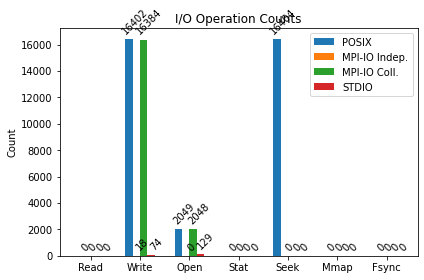

In [155]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example-logs/example.darshan", dtype='numpy')
r3.read_all()

from darshan.experimental.plots.matplotlib import plot_opcounts
plot_opcounts(r3)

### DXT Records

DXT records are also supported, and can be loaded individually on a per module basis as follows:


In [156]:
import darshan

report2 = darshan.DarshanReport("example-logs/dxt.darshan", dtype='numpy')
report2.info()

 Skipping. Log does not contain data for mod: LUSTRE


Filename:       example-logs/dxt.darshan
Times:          2020-04-21 07:45:33 to 2020-04-21 08:10:01 (Duration 0:24:28)
Executeable:    
Processes:      1
JobID:          1537455
UID:            8699
Modules in Log: ['POSIX', 'STDIO', 'DXT_POSIX']
Loaded Records: {'POSIX': 214, 'STDIO': 1, 'DXT_POSIX': 169}
Name Records:   218
Darshan/Hints:  {'lib_ver': '3.2.0-pre1', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(139730655973232) (tmp)


In [157]:
report2.records['DXT_POSIX'][0].keys()

dict_keys(['id', 'rank', 'hostname', 'write_count', 'read_count', 'write_segments', 'read_segments'])

Sometimes it is easier to visualize or transform data to get an overview:

In [158]:
# load prepared transformations
# might require: pip install pillow
from darshan.experimental.transforms.dxt2png import segment, wallclock

report2.mod_read_all_dxt_records("DXT_POSIX", dtype="dict")  # need dict format for now
rec = report2.records['DXT_POSIX'][2]

len(trace): 163 minsize: 65472 duration: 0.14281702041625977


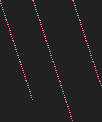

In [159]:
segment(rec)

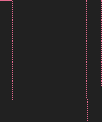

In [160]:
wallclock(rec)

In [161]:
from IPython.display import display, HTML

report2.mod_read_all_dxt_records("DXT_POSIX", dtype="pandas") 

print("Write Segments:")
display(report2.records['DXT_POSIX'][2]['write_segments'])
print("Read Segments:")
display(report2.records['DXT_POSIX'][2]['read_segments'])

Write Segments:


""


Read Segments:


,offset,length,start_time,end_time
0,0,1023,0.010193,0.027233
1,1023,1023,0.027261,0.027269
2,2046,1023,0.027275,0.027279
3,3069,1023,0.027285,0.027288
4,4092,1023,0.027294,0.027297
...,...,...,...,...
158,41943,1023,0.152966,0.152968
159,42966,1023,0.152974,0.152977
160,43989,1023,0.152989,0.152993
161,45012,1023,0.152998,0.153002


Exercise left for the reader ;P 
Implement a custom aggregator/summary function and commit it as a contribution to pydarshan:

In [162]:
# Create file: <darshan-repo>/darshan-util/pydarshan/darshan/experimental/aggregators/dxt_summary.py
from darshan.report import *

def dxt_summary(self):
    """
    Count records for every name record.

    Args:
        mod_name (str): 

    Return:
        None
    """

    counts = {}

    for mod, records in self.records.items():
        for rec in records:
            if rec['id'] not in counts:
                counts[rec['id']] = {'name': self.name_records[rec['id']], 'counts': {}}

            if mod not in counts[rec['id']]['counts']:
                counts[rec['id']]['counts'][mod] = 1
            else:
                counts[rec['id']]['counts'][mod] += 1

    return counts


## Exporting Data for Use in Third-Party Analysis

Darshan logs may be used in contexts beyond our imagination. To make this effortless export in JSON is easy.

In [163]:
import darshan
report = darshan.DarshanReport("example-logs/example.darshan", read_all=True, dtype='numpy')
report.to_json()

'{"version": 1, "metadata": {"job": {"uid": 69615, "start_time": 1490000867, "end_time": 1490000983, "nprocs": 2048, "jobid": 4478544, "metadata": {"lib_ver": "3.1.3", "h": "romio_no_indep_rw=true;cb_nodes=4"}}, "exe": "/global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32"}, "records": {"POSIX": [{"id": 6301063301082038805, "rank": -1, "counters": [2049, -1, -1, 0, 16402, 16404, 0, 0, 0, 0, -1, -1, 0, 0, 0, 2199023259968, 0, 2199023261831, 0, 0, 0, 16384, 0, 0, 8, 16401, 1048576, 0, 134217728, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0, 0, 0, 0, 16384, 0, 274743689216, 274743691264, 0, 0, 10240, 4096, 0, 0, 134217728, 272, 544, 328, 16384, 8, 2, 2, 597, 1073741824, 1312, 1073741824], "fcounters": [3.9191410541534424, 0.0, 3.940063953399658, 3.927093982696533, 3.936579942703247, 0.0, 115.0781660079956, 115.77035808563232, 0.0, 100397.60042190552, 11.300841808319092, 0.0, 17.940945863723755, 

## Error Handling?

Currently, playing with two modes, both have their pros and cons.

Generally, should expose errors and let users handle them. At the same time, just skipping invalid load requests does little harm but greatly improves convienince.

Could add a switch to enable disable these guards :/

In [164]:
report = darshan.DarshanReport("example-logs/example.darshan")

In [165]:
report.mod_read_all_records("ABC") # Expect KeyError

KeyError: 'ABC'

In [ ]:
report.mod_read_all_dxt_records("ABC") # Expect warning, but not exception